# Librairie

In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  sklearn


import matplotlib
print(f"sklearn version: {sklearn.__version__}")
print("seaborn versionr: ", sns.__version__)
print("pandas version :" ,pd.__version__)
print("matplotlib.pyplot version " ,matplotlib.__version__)


## importation de libraire
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

sklearn version: 1.6.1
seaborn versionr:  0.13.2
pandas version : 2.2.3
matplotlib.pyplot version  3.10.1


## Load dataset Diaomonds of sns as df

In [22]:
df= sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## After fondamental analysis 
we are: 
 - cut : quality of the diomond
 - color : quality about the color of the diomond
 - clarity : quality about the clarity of the dimonds

## Utilisation de OrdinalEncoder

- Réservé a l'encodage des variables Ordin  les (avec une hierachie)
- L'argument categories permet de gerer l'ordre 
- handle_unknown="use_encoded_value" et unknown_value=-1 permt d rendre le code plus robuste

In [23]:
# fonction
import sys
sys.path.append(r"C:\Users\franc\Desktop\DATA_SCIENCE\ML_PRO\DOC")
from perso import *

In [24]:
explore_col(df)

Les 5 valeurs prises par 'cut' sont : ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Les 7 valeurs prises par 'color' sont : ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Les 8 valeurs prises par 'clarity' sont : ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [25]:
cut_order=['Fair','Good','Very Good','Premium','Ideal']
color_order=['J','I','H','G','F','E','D']
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


encoder= OrdinalEncoder(
    categories=[cut_order,color_order,clarity_order] ,
    handle_unknown="use_encoded_value", # utilise les valeur encoder s'il rencontre une nouvelle valeur 
    #(donc on peut nous meme essayer d'imaginer et remplir les liste_order de ce qui pourrai avenir dans le future comme Very Bad ou Bad pour cut )
    unknown_value=-1 # il donnera -1 comme valeur a une valeur non numerique qu'il rencontrera s'il elle n'a pas été inséré dans notre list_order
      )
encoder.fit(df[["cut","color","clarity"]])
X=encoder.transform(df[["cut","color","clarity"]])




In [26]:
df_new= pd.DataFrame(
    X,
    columns=["cut","color","clarity"]
        )
    
df_new

,cut,color,clarity
0,4.0,5.0,6.0
1,3.0,5.0,5.0
2,1.0,5.0,3.0
3,3.0,1.0,4.0
4,1.0,0.0,6.0
...,...,...,...
53935,4.0,6.0,5.0
53936,1.0,6.0,5.0
53937,2.0,6.0,5.0
53938,3.0,2.0,6.0


In [27]:
## eg: 
encoder.transform([["Fair","value","Good"]])

c:\Users\franc\.conda\envs\ML_PRO\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[ 0., -1., -1.]])

## Load MPG Data

In [28]:
df= sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# **OneHotEncoder**

- permet d'encoder les categories nomminales(san ordre ou hierachie presente)
- principaux arguments a connaitre : 
    - sparse/sparse_output(selon la version de sklearn): retourne une matrice creuse 
    - drop: élimine une des colonnes pour éviter le probleme de multi-colinearité
    - handle_unknown : rajoute une colonne supplementaire

In [29]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [30]:
encoder1= OneHotEncoder(sparse_output=False)
encoder1.fit(df[["origin","name"]]) 
result_OneHotEncoder= encoder1.transform(df[['origin', 'name']])
result_OneHotEncoder
## a la base c'est ça qui devrait sortir (sans sparse/sparse_output) ,sparse matrix (matrice creuse) c'est a dire matrice avec plein de 0 ,
# qui est compressé pour ne pas etre affiché 
#<398x308 sparse matrix of type '<class 'numpy.float64'>'
#with 796 stored elements in Compressed Sparse Row format> """

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(398, 308))

<Axes: >

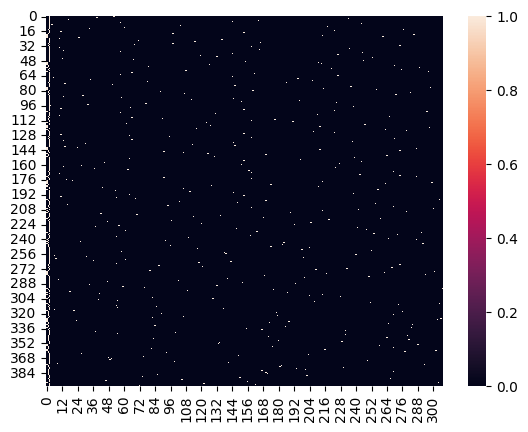

In [31]:
sns.heatmap(result_OneHotEncoder)

## **USE Drop and handle_uknow **

In [32]:
encoder1= OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
encoder1.fit(df[['origin']]) 
result_OneHotEncoder= encoder1.transform(df[['origin']])
result_OneHotEncoder

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

<Axes: >

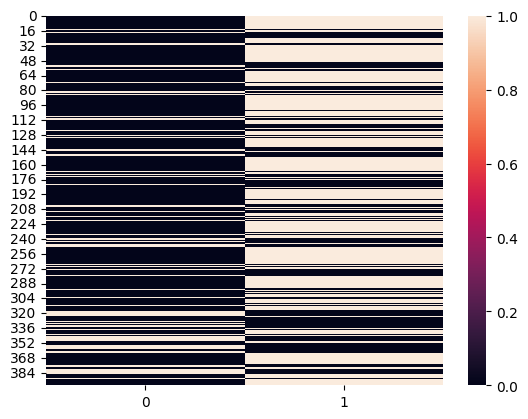

In [33]:
sns.heatmap(result_OneHotEncoder)

## **Comment Encoder une Target ?**


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [36]:
x=df[["mpg", "cylinders","displacement", "horsepower"]]
y=df["name"]
y

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [37]:
model= DecisionTreeClassifier()
model.fit(x,y)


DecisionTreeClassifier()

In [38]:
model.predict([[18.0,8,307,130.0]])

c:\Users\franc\.conda\envs\ML_PRO\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['chevrolet chevelle malibu'], dtype=object)